<a href="https://colab.research.google.com/github/Ayushsevare/pythonProjectuser2/blob/master/Cancer_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/Cancer_Data.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
pd.set_option('display.max_columns',None)
df = pd.read_csv("/content/Cancer_Data.csv")
df.sample(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
559,925291,B,11.51,23.93,74.52,403.5,0.09261,0.1021,0.1112,0.04105,0.1388,0.06570,0.2388,2.9040,1.936,16.97,0.008200,0.02982,0.05738,0.01267,0.01488,0.004738,12.48,37.16,82.28,474.2,0.1298,0.2517,0.3630,0.09653,0.2112,0.08732,NaN
230,881972,M,17.05,19.08,113.40,895.0,0.11410,0.1572,0.1910,0.10900,0.2131,0.06325,0.2959,0.6790,2.153,31.98,0.005532,0.02008,0.03055,0.01384,0.01177,0.002336,19.59,24.89,133.50,1189.0,0.1703,0.3934,0.5018,0.25430,0.3109,0.09061,NaN
516,916799,M,18.31,20.58,120.80,1052.0,0.10680,0.1248,0.1569,0.09451,0.1860,0.05941,0.5449,0.9225,3.218,67.36,0.006176,0.01877,0.02913,0.01046,0.01559,0.002725,21.86,26.20,142.20,1493.0,0.1492,0.2536,0.3759,0.15100,0.3074,0.07863,NaN


In [ ]:
df.shape

(569, 33)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
len(df['id'].unique())

569

In [ ]:
df1 = df.drop(["id","Unnamed: 32"],axis = 'columns')
df1.shape

(569, 31)

In [ ]:
df1.sample(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
235,B,14.03,21.25,89.79,603.4,0.09070,0.06945,0.01462,0.01896,0.1517,0.05835,0.2589,1.5030,1.667,22.07,0.007389,0.01383,0.007302,0.010040,0.01263,0.002925,15.33,30.28,98.27,715.5,0.1287,0.1513,0.06231,0.07963,0.2226,0.07617
77,M,18.05,16.15,120.20,1006.0,0.10650,0.21460,0.16840,0.10800,0.2152,0.06673,0.9806,0.5505,6.311,134.80,0.007940,0.05839,0.046580,0.020700,0.02591,0.007054,22.39,18.91,150.10,1610.0,0.1478,0.5634,0.37860,0.21020,0.3751,0.11080
184,M,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,0.1727,0.06317,0.2054,0.4956,1.344,19.53,0.003290,0.01395,0.017740,0.006009,0.01172,0.002575,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df1['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [ ]:
encoder = LabelEncoder()
df1['diagnosis'] = encoder.fit_transform(df1['diagnosis'])
df1.sample(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
50,0,11.76,21.60,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.2100,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563
227,0,15.00,15.51,97.45,684.5,0.08371,0.10960,0.06505,0.03780,0.1881,0.05907,0.2318,0.4966,2.276,19.88,0.004119,0.032070,0.03644,0.011550,0.01391,0.003204,16.41,19.31,114.20,808.2,0.1136,0.36270,0.34020,0.13790,0.2954,0.08362


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df_x = df1.drop('diagnosis',axis='columns')
df_x.sample(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
217,10.20,17.48,65.05,321.2,0.08054,0.05907,0.05774,0.01071,0.1964,0.06315,0.3567,1.922,2.747,22.79,0.00468,0.0312,0.05774,0.01071,0.02560,0.004613,11.48,24.47,75.4,403.7,0.09527,0.1397,0.1925,0.03571,0.2868,0.07809
138,14.95,17.57,96.85,678.1,0.11670,0.13050,0.15390,0.08624,0.1957,0.06216,1.2960,1.452,8.419,101.90,0.01000,0.0348,0.06577,0.02801,0.05168,0.002887,18.55,21.43,121.4,971.4,0.14110,0.2164,0.3355,0.16670,0.3414,0.07147


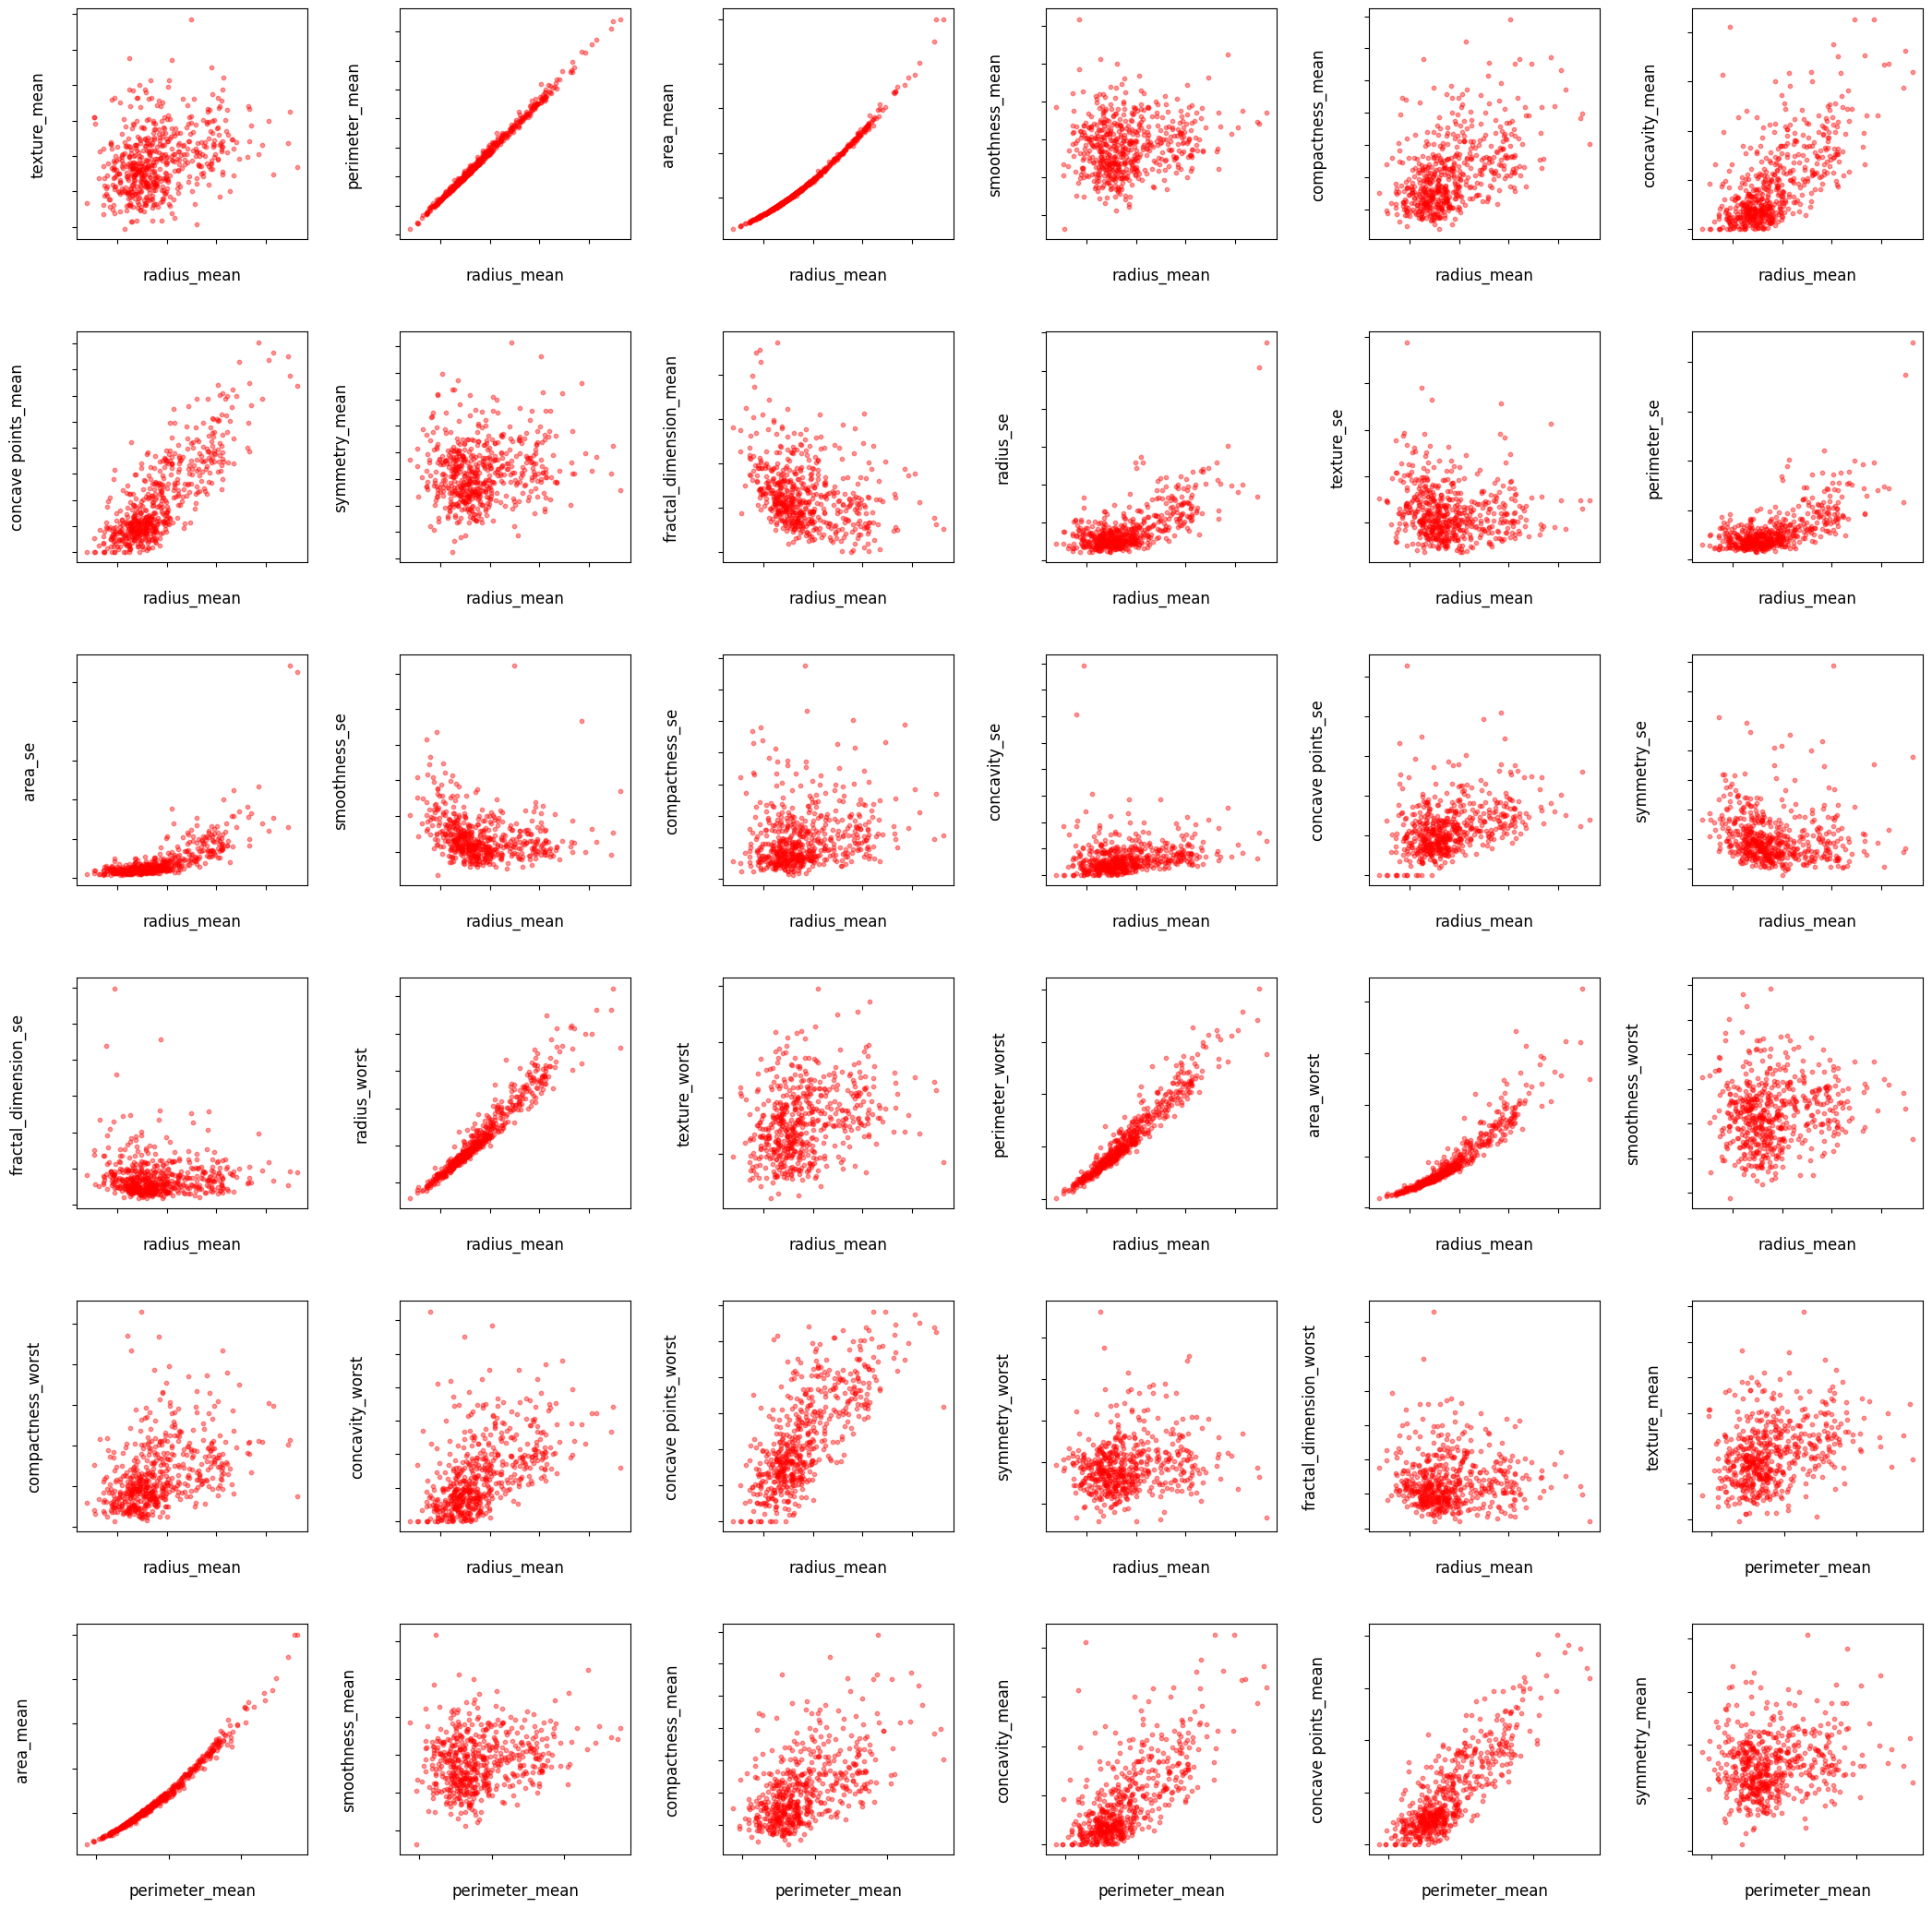

In [ ]:
x_ax = 6
y_ax = 6
no = 1
exit = False
cols = list(df_x.columns)
plt.figure(figsize=(25,25))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)
for i,f1 in enumerate(cols):
    if exit:
        break
    temp = cols
    temp.pop(i)
    for j,f2 in enumerate(temp):
        if no > x_ax*y_ax:
            exit = True
            break
        plt.subplot(x_ax,y_ax,no)
        plt.scatter(df_x[f1],df_x[f2],s=10,c='red',alpha=0.4)
        plt.xticks(color='w')
        plt.yticks(color='w')
        plt.xlabel(f"{f1}",fontsize=12)
        plt.ylabel(f"{f2}",fontsize=12)
        no = no+1

In [ ]:
df_x['perimeter_mean/radius_mean'] = df_x['perimeter_mean']/df_x['radius_mean']
df_x['area_mean/radius_mean'] = df_x['area_mean']/df_x['radius_mean']
df_x['radius_worst/radius_mean'] = df_x['radius_worst']/df_x['radius_mean']
df_x['perimeter_worst/radius_mean'] = df_x['perimeter_worst']/df_x['radius_mean']

In [ ]:
cols_extracted_drop = ['perimeter_mean','radius_mean','area_mean','radius_worst','perimeter_worst']
df_extracted = df_x.drop(cols_extracted_drop,axis='columns')

In [ ]:
df_extracted.sample(3)

,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,perimeter_mean/radius_mean,area_mean/radius_mean,radius_worst/radius_mean,perimeter_worst/radius_mean
226,15.46,0.10530,0.07722,0.006643,0.01216,0.1788,0.06450,0.1913,0.9027,1.208,11.86,0.006513,0.008061,0.002817,0.004972,0.01502,0.002821,19.80,395.4,0.1341,0.11530,0.02639,0.04464,0.2615,0.08269,6.381226,31.570881,1.103448,7.037356
297,18.14,0.09968,0.05914,0.026850,0.03515,0.1619,0.06287,0.6450,2.1050,4.138,49.11,0.005596,0.010050,0.012720,0.014320,0.01575,0.002758,23.39,553.6,0.1137,0.07974,0.06120,0.07160,0.1978,0.06915,6.377551,36.658163,1.136054,7.236395
551,22.44,0.09566,0.08194,0.048240,0.02257,0.2030,0.06552,0.2800,1.4670,1.994,17.85,0.003495,0.030510,0.034450,0.010240,0.02912,0.004723,28.26,436.6,0.1087,0.17820,0.15640,0.06413,0.3169,0.08032,6.423181,33.998203,1.079964,6.990117


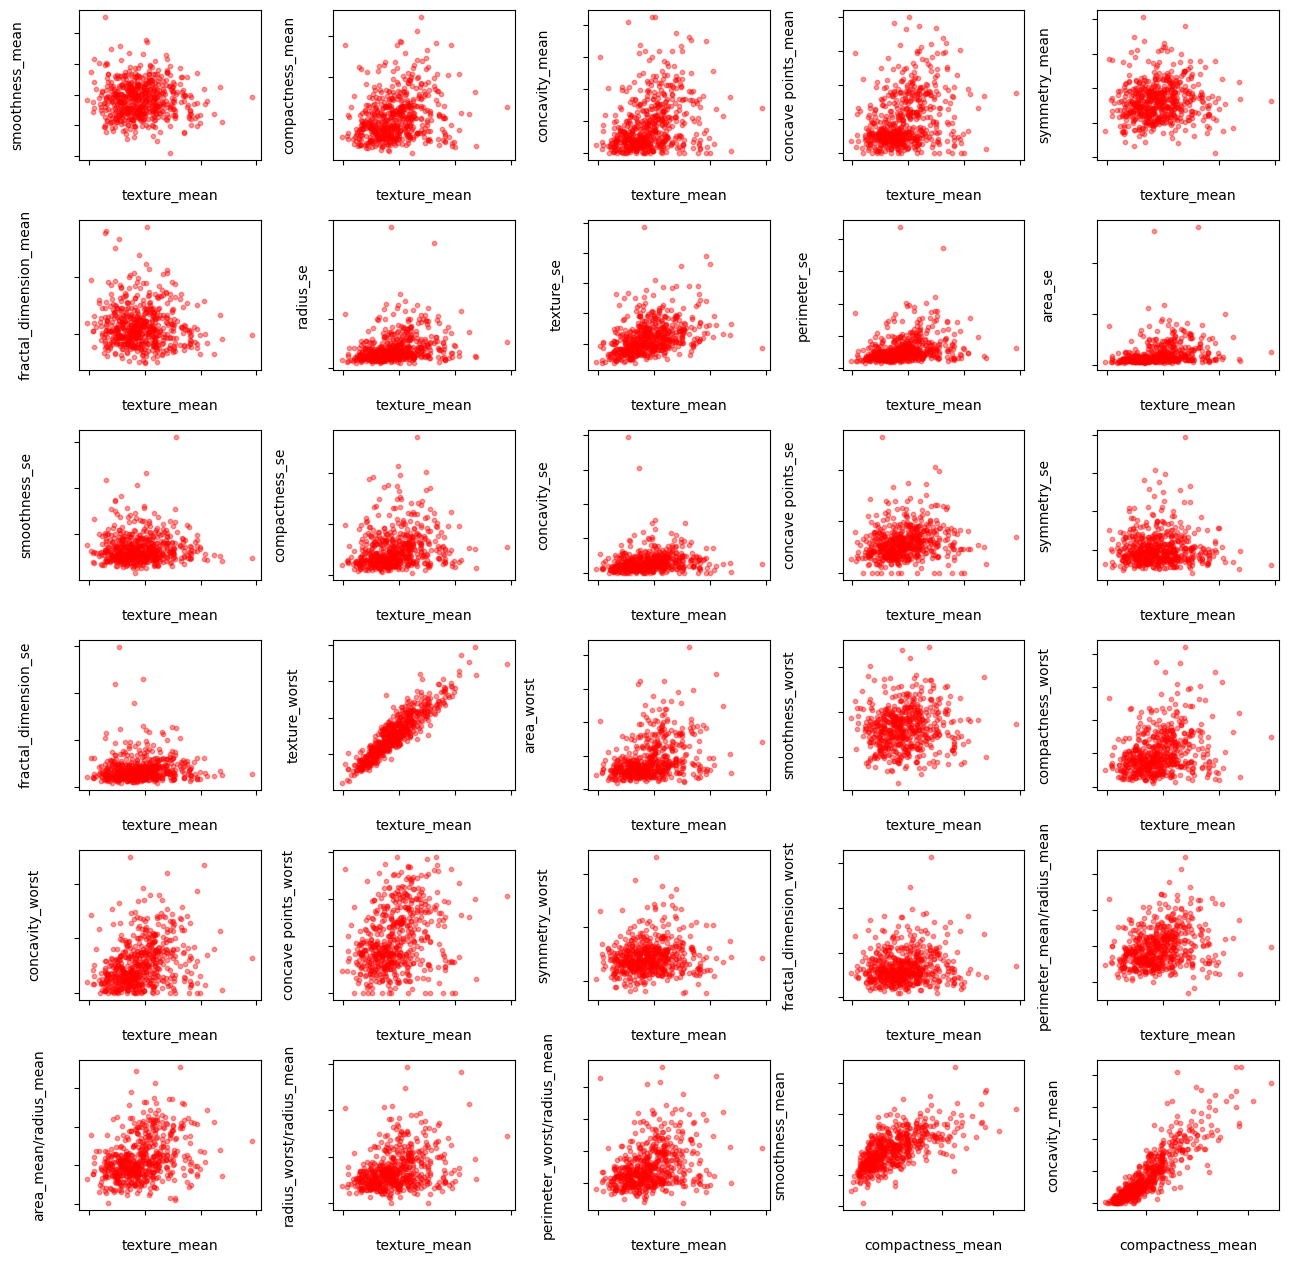

In [ ]:
x_ax = 6
y_ax = 5
no = 1
exit = False
cols = list(df_extracted.columns)
plt.figure(figsize=(15,15))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
for i, f1 in enumerate(cols):
    if exit:
        break
    temp = cols
    temp.pop(i)
    for j, f2 in enumerate(temp):
        if no > x_ax*y_ax:
            exit = True
            break
        plt.subplot(x_ax, y_ax, no)
        plt.scatter(df_extracted[f1], df_extracted[f2], s=10, c='red', alpha=0.4)
        plt.xticks(color='w')
        plt.yticks(color='w')
        plt.xlabel(f"{f1}")
        plt.ylabel(f"{f2}")
        no += 1


In [ ]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore',message='')

In [ ]:
X = df_extracted
y = df['diagnosis']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
X_train.shape,X_test.shape

((455, 29), (114, 29))

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [ ]:
algos = [RandomForestClassifier(),BaggingClassifier(),DecisionTreeClassifier(),SVC(),LogisticRegression()]
for algo in algos:
    print(str(algo))
    cs = cross_val_score(algo,X,y)
    print("cross_val_score ",cs)
    print("average ",sum(cs)/len(cs))
    print('')

RandomForestClassifier()
cross_val_score  [0.95614035 0.95614035 0.99122807 0.96491228 0.97345133]
average  0.9683744760130415

BaggingClassifier()
cross_val_score  [0.92105263 0.92982456 0.98245614 0.93859649 0.98230088]
average  0.9508461419034312

DecisionTreeClassifier()
cross_val_score  [0.93859649 0.92105263 0.94736842 0.89473684 0.97345133]
average  0.9350411426797081

SVC()
cross_val_score  [0.85964912 0.90350877 0.92982456 0.94736842 0.94690265]
average  0.9174507064120478

LogisticRegression()
cross_val_score  [0.92982456 0.92105263 0.97368421 0.93859649 0.9380531 ]
average  0.9402421984163949



In [ ]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
model.score(X_train,y_train)

1.0

In [ ]:
model.score(X_test,y_test)

0.9736842105263158